In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf.config.list_physical_devices("GPU")

[]

# Introduction to neural network classification with TensorFlow

## Creating data to view and fit

In [3]:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [4]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Let's visualize our data!

In [6]:
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


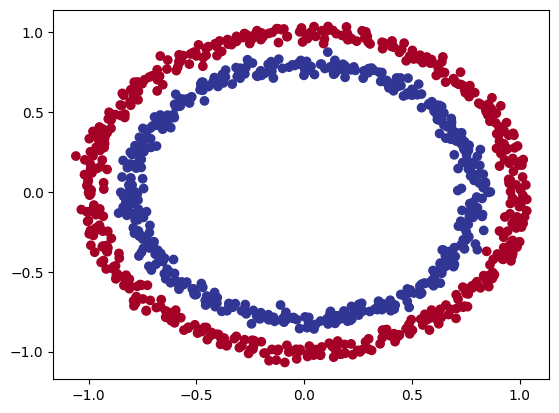

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
len(X), len(y)

(1000, 1000)

In [10]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(2)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=100, verbose=1)

model.evaluate(X_test, y_test)

Epoch 1/100
25/25 [==============================] - 3s 10ms/step - loss: 4.2123 - accuracy: 0.5075
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 3.8455 - accuracy: 0.5038
Epoch 3/100
25/25 [==============================] - 0s 11ms/step - loss: 3.3747 - accuracy: 0.5000
Epoch 4/100
25/25 [==============================] - 0s 9ms/step - loss: 2.2188 - accuracy: 0.4988
Epoch 5/100
25/25 [==============================] - 0s 12ms/step - loss: 1.0275 - accuracy: 0.5038
Epoch 6/100
25/25 [==============================] - 0s 12ms/step - loss: 0.8096 - accuracy: 0.5050
Epoch 7/100
25/25 [==============================] - 0s 14ms/step - loss: 0.7965 - accuracy: 0.5025
Epoch 8/100
25/25 [==============================] - 0s 13ms/step - loss: 0.7877 - accuracy: 0.4988
Epoch 9/100
25/25 [==============================] - 0s 9ms/step - loss: 0.7802 - accuracy: 0.4925
Epoch 10/100
25/25 [==============================] - 0s 11ms/step - loss: 0.7733 - accuracy: 0.4938
Ep

[0.6953767538070679, 0.49000000953674316]

In [12]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 4.4134 - accuracy: 0.4770
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 4.3832 - accuracy: 0.4700
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 4.3518 - accuracy: 0.4710
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 4.3414 - accuracy: 0.4690
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 4.3353 - accuracy: 0.4690


In [13]:
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7124 - accuracy: 0.4900


[0.7123523950576782, 0.49000000953674316]

In [14]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X, y, epochs=100, verbose=0)

In [15]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.693531334400177, 0.5]

## Improve our model

In [16]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

In [17]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X, y, epochs=100, verbose=0)

In [18]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5110


[0.698028028011322, 0.5109999775886536]

In [19]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [20]:
def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


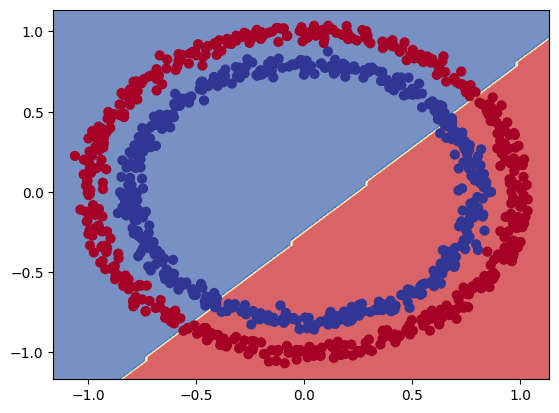

In [21]:
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [22]:
tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [23]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_reg_train, axis=1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 480.8053 - mae: 480.8053
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 355.4275 - mae: 355.4275
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 234.7911 - mae: 234.7911
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 109.6721 - mae: 109.6721
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 56.1995 - mae: 56.1995
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 88.3176 - mae: 88.3176
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 67.5147 - mae: 67.5147
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 43.7236 - mae: 43.7236
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 49.0552 - mae: 49.0552
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 41.7665 - mae: 41.7665
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 4ms/step


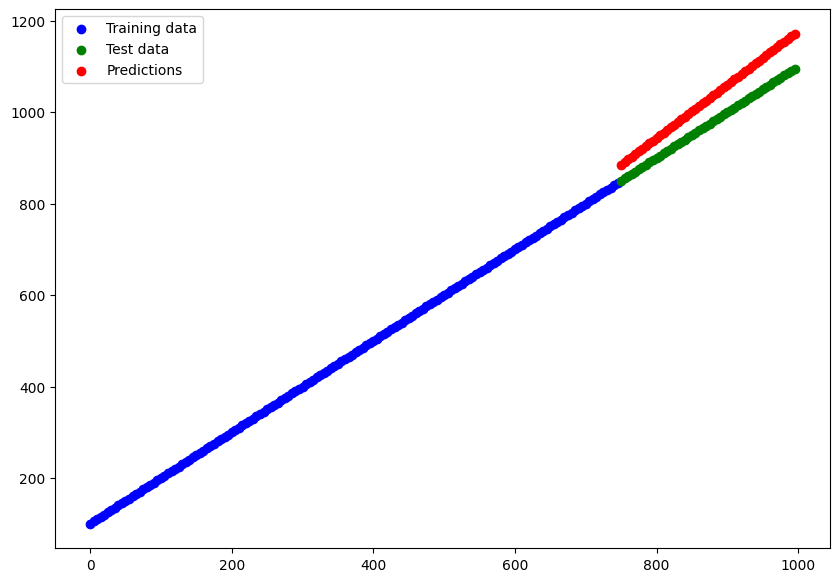

In [24]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [25]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.4074 - accuracy: 0.4740
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3769 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3522 - accuracy: 0.4790
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3399 - accuracy: 0.4790
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3367 - accuracy: 0.4790
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3201 - accuracy: 0.4790
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2469 - accuracy: 0.4800
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2354 - accuracy: 0.4800
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2279 - accuracy: 0.4800
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2180 - accuracy: 0.4800
Epoch 11/

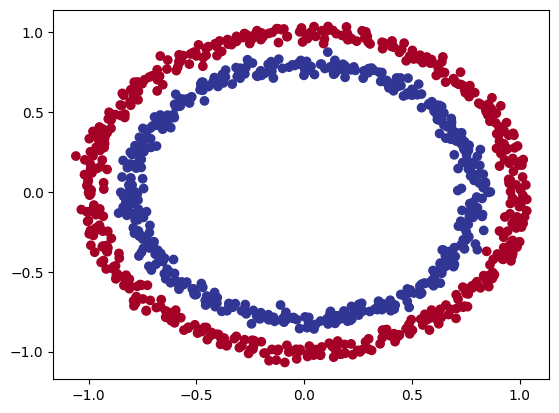

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


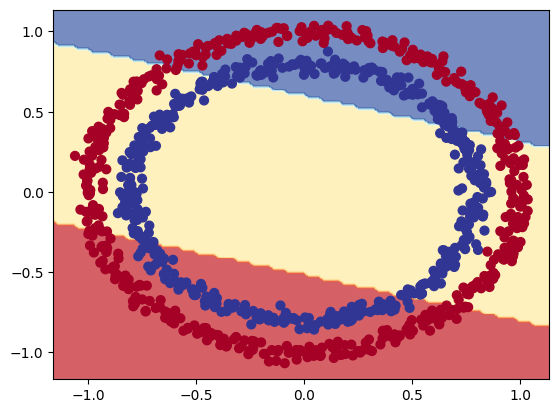

In [27]:
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

In [28]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.9155 - accuracy: 0.4870
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9088 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8981 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8852 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8826 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8808 - accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8331 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8279 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8264 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8253 - accuracy: 0.4860
Epoch 11/

In [29]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7156 - accuracy: 0.4930
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7069 - accuracy: 0.4960
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7026 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7002 - accuracy: 0.4700
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.4770
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.4740
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.4750
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4900
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4990
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


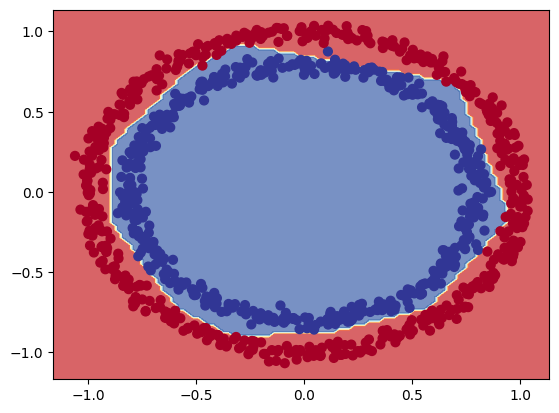

In [30]:
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

In [31]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

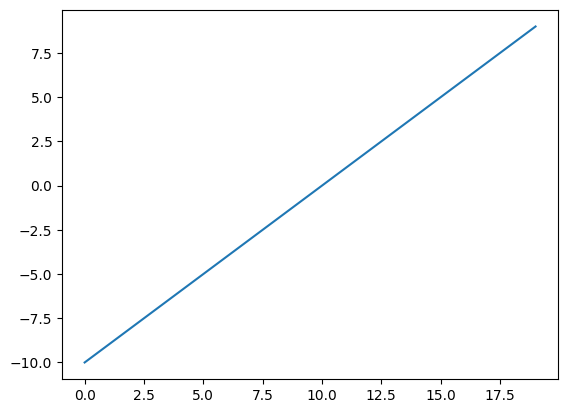

In [32]:
plt.plot(A)

## Evaluating and Improving our Classification Model

In [33]:
len(X), len(y)

(1000, 1000)

In [52]:
X_train = X[:800]
y_train = y[:800]

X_test = X[800:]
y_test = y[800:]

In [53]:
len(X_train)

800

In [55]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 2s 4ms/step - loss: 0.6858 - accuracy: 0.5312
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6770 - accuracy: 0.5763
Epoch 3/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6682 - accuracy: 0.6037
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6606 - accuracy: 0.6075
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6492 - accuracy: 0.6737
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6337 - accuracy: 0.6087
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6158 - accuracy: 0.7362
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5978 - accuracy: 0.7400
Epoch 9/25
25/25 [==============================] - 0s 4ms/step - loss: 0.5631 - accuracy: 0.7912
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5221 - accuracy: 0.8200
Epoch 11/25
25/25 [

In [56]:
model_8.evaluate(X_train, y_train)

25/25 [==============================] - 0s 2ms/step - loss: 0.1414 - accuracy: 0.9875


[0.1414126455783844, 0.987500011920929]

In [57]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 1s 7ms/step - loss: 0.1477 - accuracy: 0.9800


[0.14772358536720276, 0.9800000190734863]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 3ms/step
doing binary classification


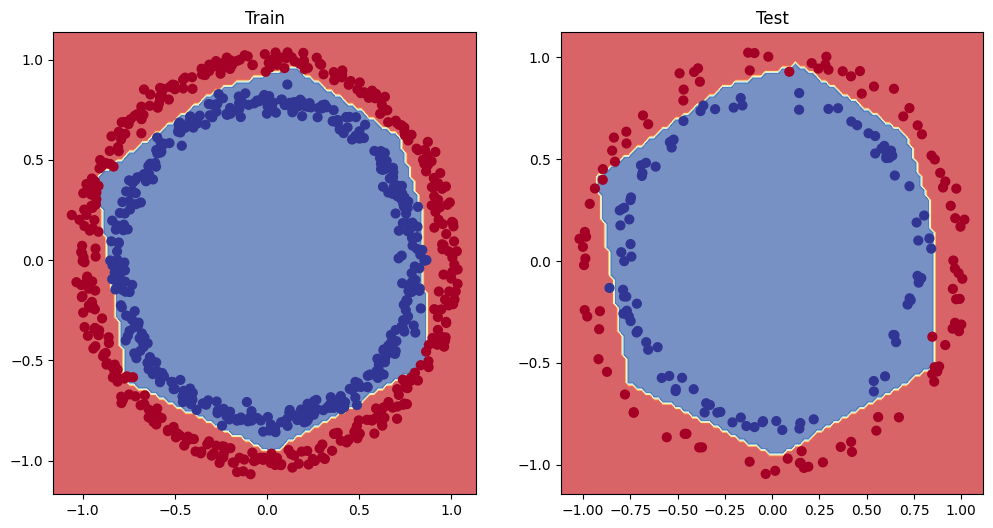

In [58]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

## Plot the loss (or training) curves

In [59]:
history.history

{'loss': [0.6858357191085815,
  0.6770446300506592,
  0.668160617351532,
  0.6605610847473145,
  0.6492383480072021,
  0.6337414383888245,
  0.615797758102417,
  0.5978414416313171,
  0.5631198287010193,
  0.5221359133720398,
  0.4837244749069214,
  0.46181055903434753,
  0.42399173974990845,
  0.3837995231151581,
  0.3542701005935669,
  0.332345187664032,
  0.30277466773986816,
  0.28362271189689636,
  0.25431472063064575,
  0.23802822828292847,
  0.2249443233013153,
  0.20572035014629364,
  0.18412058055400848,
  0.1663844883441925,
  0.1644752323627472],
 'accuracy': [0.53125,
  0.5762500166893005,
  0.6037499904632568,
  0.6075000166893005,
  0.6737499833106995,
  0.6087499856948853,
  0.7362499833106995,
  0.7400000095367432,
  0.7912499904632568,
  0.8199999928474426,
  0.8062499761581421,
  0.8112499713897705,
  0.8262500166893005,
  0.856249988079071,
  0.8525000214576721,
  0.8700000047683716,
  0.8887500166893005,
  0.8962500095367432,
  0.9175000190734863,
  0.94249999523162

In [60]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.685836,0.53125
1,0.677045,0.57625
2,0.668161,0.60375
3,0.660561,0.60750
4,0.649238,0.67375
5,0.633741,0.60875
6,0.615798,0.73625
7,0.597841,0.74000
8,0.563120,0.79125
9,0.522136,0.82000


Text(0.5, 1.0, 'Model_8 loss cureves')

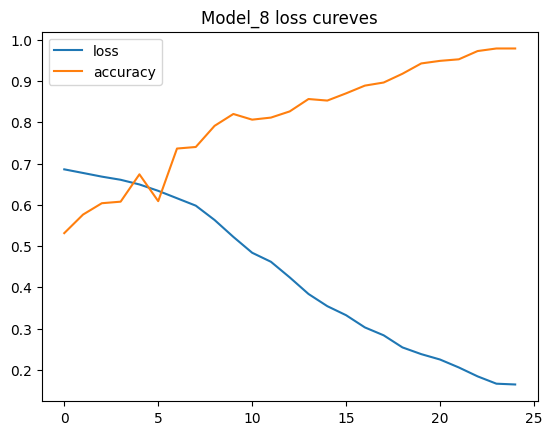

In [61]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss cureves")